In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:

df2=pd.read_csv("loan.csv")
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Self_Employed', ylabel='count'>

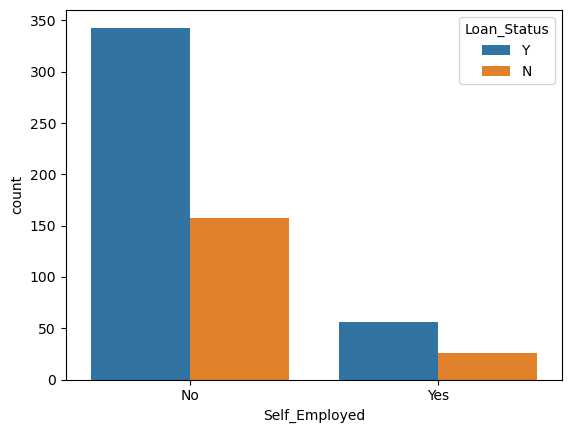

In [58]:
sns.countplot(data=df2,x='Self_Employed',hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

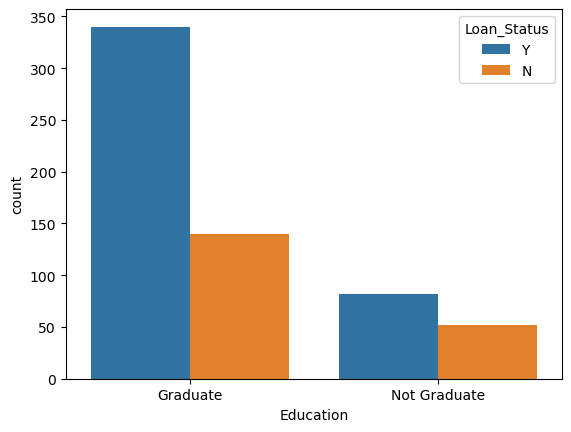

In [60]:
sns.countplot(data=df2,x='Education',hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

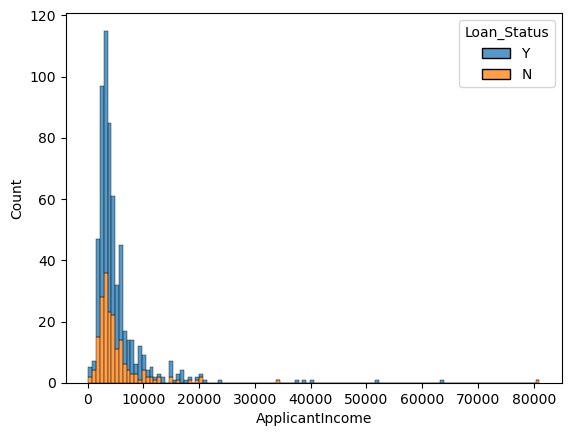

In [62]:
sns.histplot(data=df2, x='ApplicantIncome', hue='Loan_Status', multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Count'>

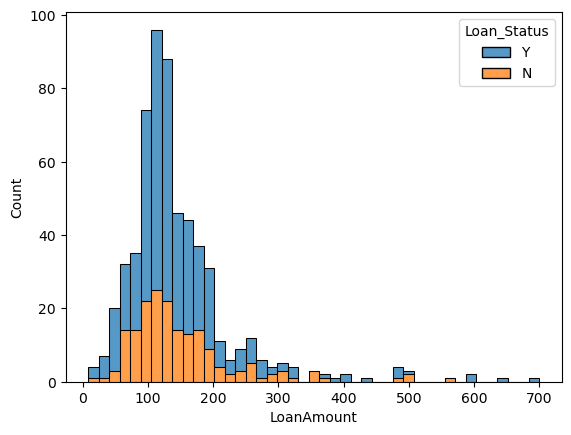

In [63]:
sns.histplot(data=df2, x='LoanAmount', hue='Loan_Status', multiple="stack")

<Axes: xlabel='Credit_History', ylabel='Count'>

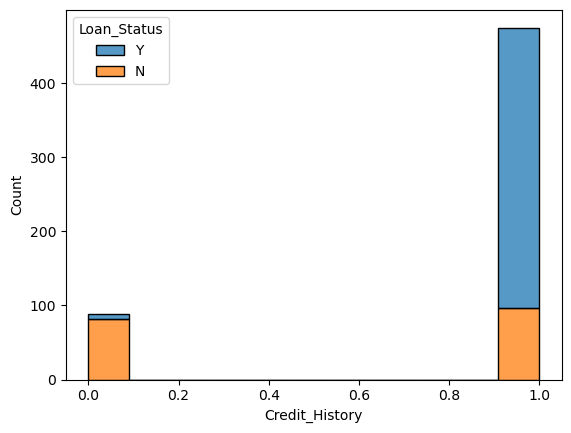

In [66]:
sns.histplot(data=df2, x='Credit_History', hue='Loan_Status', multiple="stack")

In [68]:
 df2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
df2['Gender'] = df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Married'] = df2['Married'].fillna(df2['Married'].mode()[0])
df2['Dependents'] = df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed'] = df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount'] = df2['LoanAmount'].fillna(df2['LoanAmount'].median())
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode()[0])
df2['Credit_History'] = df2['Credit_History'].fillna(df2['Credit_History'].mode()[0])

In [72]:
 df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [76]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [78]:
df2['Dependents'] = df2['Dependents'].replace('3+', 3).astype(int)

In [80]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in label_cols:
    df2[col] = le.fit_transform(df2[col])

In [82]:
df2.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Loan_Status
1    422
0    192
Name: count, dtype: int64


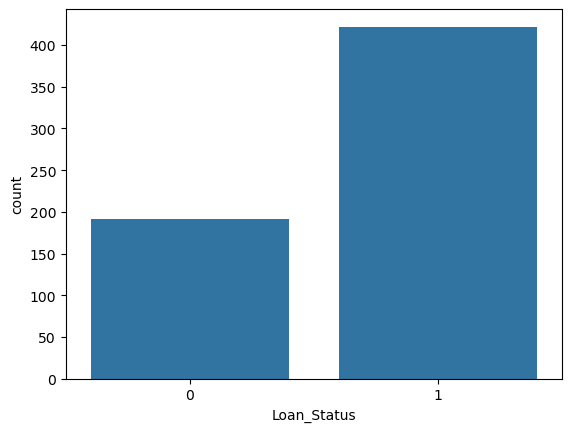

In [84]:
sns.countplot(x=df2['Loan_Status'])
print(df2.Loan_Status.value_counts())

In [86]:
from sklearn.utils import resample

df_majority = df2[(df2['Loan_Status']==1)] 
df_minority = df2[(df2['Loan_Status']==0)] 

df_minority_upsampled = resample(df_minority, 
n_samples= 422, 
random_state=0)  

df22 = pd.concat([df_minority_upsampled, df_majority])

Loan_Status
0    422
1    422
Name: count, dtype: int64


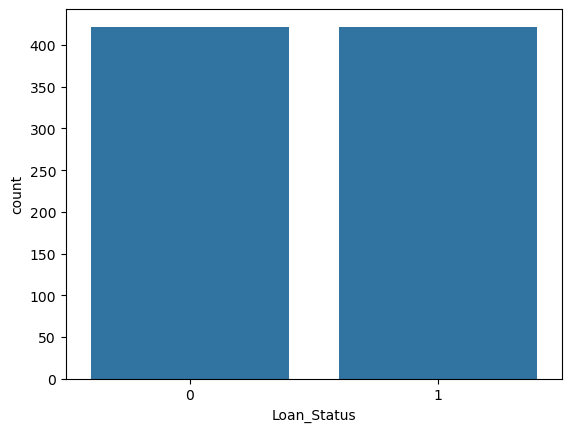

In [88]:
sns.countplot(x=df22['Loan_Status'])
print(df22.Loan_Status.value_counts())

<Axes: >

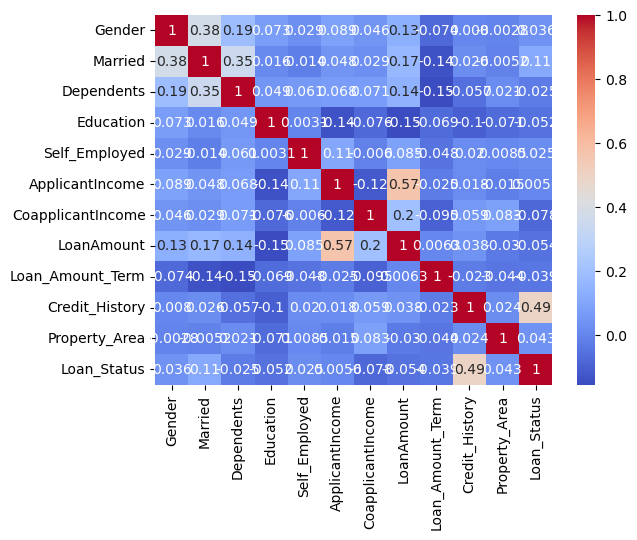

In [90]:
sns.heatmap(df22.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2g', cmap='coolwarm')

In [108]:
df22 = df22.drop('Loan_ID', axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [ ]:

X = df22.drop('Loan_Status', axis=1)
y = df22['Loan_Status']  


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)
DecisionTreeRegressor(random_state=0)
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
RandomForestRegressor(random_state=0)
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
se = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.21526627218934913
MSE is 0.2024639158003871
R2 score is 0.5402811167227834
RMSE score is 0.4499599046586119


In [119]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)
from sklearn import metrics
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.38620297713370383
MSE is 0.2024639158003871
R2 score is 0.18875253939746683
RMSE score is 0.4499599046586119


In [121]:
# Sample user input 
sample_input = {
    'Gender': 1,              
    'Married': 1,             
    'Dependents': 0,          
    'Education': 0,           
    'Self_Employed': 0,       
    'ApplicantIncome': 5000,  
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,        
    'Loan_Amount_Term': 360,  
    'Credit_History': 1.0,    
    'Property_Area': 2        
}

input_df = pd.DataFrame([sample_input])

predicted_value = rf.predict(input_df)
print(predicted_value)

predicted_class = 1 if predicted_value[0] >= 0.5 else 0


if predicted_class == 1:
    print("Loan Approved ")
else:
    print("Loan Not Approved ")


[0.73]
Loan Approved 
